# Основы нейронных сетей

## Что такое нейронная сеть и как она работает?

**Нейронная сеть** — это вычислительная модель, вдохновлённая биологическими нейронами мозга. Она состоит из слоёв узлов (нейронов), которые связаны между собой весами. Эти узлы преобразуют входные данные через несколько слоёв для создания прогноза на выходе.

- Архитектура: Нейронные сети имеют три типа слоёв:
- Входной слой: принимает данные для обработки.
- Скрытые слои: осуществляют нелинейные преобразования над входными данными.
- Выходной слой: возвращает прогнозы модели.

Каждый нейрон в сети выполняет линейное преобразование входов с применением весов, суммирование, а затем — применение функции активации, которая добавляет нелинейность.

## Как происходит процесс прямого распространения (forward propagation)?

**Прямое распространение (forward propagation)** — это процесс, при котором входные данные проходят через нейронную сеть, чтобы получить прогноз.

Процесс включает следующие шаги:

1. **Линейное преобразование:** Каждый нейрон вычисляет взвешенную сумму входных данных и добавляет смещение (bias):

Где 𝑤- веса, xi  — входные данные, b — смещение.

2. **Активация:** Результат линейного преобразования передаётся через функцию активации, которая вводит нелинейность:
\
Где 𝜎(z) — функция активации, z — результат линейного преобразования.

3. **Прогон через слои:** Выходы одного слоя становятся входами для следующего слоя до тех пор, пока данные не достигнут выходного слоя.

4. **Получение прогноза:** Результат выходного слоя используется как прогноз модели для данной задачи (например, классы в классификации или значение в регрессии).


## Что такое обратное распространение ошибки (backpropagation)? Как оно связано с градиентным спуском?

**Обратное распространение ошибки (backpropagation)** — это метод, используемый для обновления весов нейронной сети на основе ошибки, вычисленной в выходном слое.

Процесс работает следующим образом:

1. **Вычисление ошибки:** После получения прогноза вычисляется ошибка между фактическим значением и прогнозом с помощью функции потерь (например, MSE для регрессии, cross-entropy для классификации).

2. **Обратное распространение градиентов:** Ошибка распространяется от выходного слоя к входному, по цепочке вычисляя градиенты ошибки по весам каждого слоя с использованием правила цепочки производных.

3. **Обновление весов:** После того как градиенты для каждого веса рассчитаны, веса обновляются с использованием алгоритма градиентного спуска:

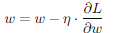

Где η — это скорость обучения, а dL/dw — градиент функции потерь по весам.

**Связь с градиентным спуском:** Обратное распространение используется для вычисления градиентов, необходимых для обновления весов в процессе градиентного спуска, минимизируя функцию потерь.

## Что такая функция активации? Зачем она нужна?

Функции активации, такие как ReLU (Rectified Linear Activation), добавляют нелинейность к выходу линейных слоев нейронных сетей. Это позволяет модели улавливать и выучивать сложные нелинейные зависимости в данных. Без функций активации нейронные сети будут эквивалентны линейной регрессии и не смогут эффективно моделировать сложные функции.


**Основные функции активации**\
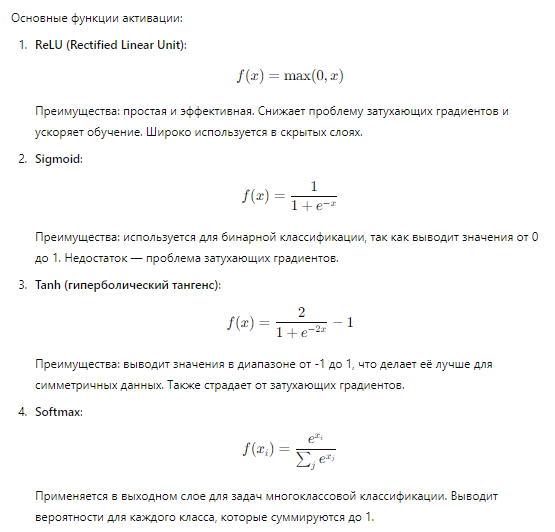

---

# Архитектуры нейронных сетей

## GAN (Generative Adversarial Networks)

Как работает GAN?


### Основы и устройство GAN (Generative Adversarial Network)

**GAN (Генеративно-Состязательная Сеть)** — это архитектура нейронной сети, состоящая из двух частей: **генератора** и **дискриминатора**, которые соревнуются друг с другом в процессе обучения. GAN был предложен Ианом Гудфеллоу в 2014 году и используется для генерации новых данных, похожих на обучающие данные (например, изображений, звука, текста).

---

### Компоненты GAN

1. **Генератор (Generator)**:
   - Задача: создавать данные, похожие на реальные.
   - Вход: случайный шум \( z \) (обычно из нормального или равномерного распределения).
   - Выход: сгенерированный объект (например, изображение).
   - Генератор пытается "обмануть" дискриминатор, чтобы тот классифицировал его сгенерированные данные как реальные.

   Архитектура генератора: обычно это сверточная нейросеть (например, в случае изображений), которая выполняет "де-свёртки" (transposed convolution), превращая шум в структурированный объект.

2. **Дискриминатор (Discriminator)**:
   - Задача: различать реальные данные из обучающей выборки и поддельные данные, созданные генератором.
   - Вход: данные (реальные или сгенерированные).
   - Выход: вероятность того, что данные являются реальными (значение от 0 до 1).
   - Дискриминатор обучается распознавать сгенерированные данные и усиливает свою способность их отличать.

   Архитектура дискриминатора: чаще всего сверточная нейросеть (если работают с изображениями), задача которой — извлечь признаки и классифицировать данные.

---

### Принцип работы

GAN обучается как игра с нулевой суммой между двумя игроками:
1. **Генератор** пытается создавать данные, которые выглядят как настоящие, чтобы обмануть дискриминатор.
2. **Дискриминатор** пытается различить реальные и поддельные данные.

#### Целевая функция
Обучение основано на **состязательной задаче**:
\[
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]
\]
- \( D(x) \): вероятность, что дискриминатор классифицирует реальные данные как настоящие.
- \( G(z) \): данные, сгенерированные генератором.
- \( z \): случайный шум.

- Генератор минимизирует вероятность того, что дискриминатор распознает его данные как поддельные.
- Дискриминатор максимизирует вероятность правильной классификации реальных и поддельных данных.

---

### Процесс обучения

1. **Инициализация**: задаются начальные веса для генератора и дискриминатора.
2. **Обновление дискриминатора**:
   - Используются реальные данные \( x \) из обучающей выборки.
   - Используются сгенерированные данные \( G(z) \), созданные генератором.
   - Дискриминатор обновляет свои веса, чтобы увеличить вероятность правильной классификации реальных и поддельных данных.
3. **Обновление генератора**:
   - Генератор получает обратный градиент от дискриминатора.
   - Его цель — уменьшить вероятность, что дискриминатор распознает его данные как поддельные.
4. Повторение шагов до сходимости.

---

### Особенности и проблемы GAN

1. **Нестабильность обучения**:
   - GAN сложно обучать из-за конкуренции между генератором и дискриминатором.
   - Возможны ситуации, когда генератор или дискриминатор доминируют, что ухудшает качество генерации.

2. **Проблема исчезающих градиентов**:
   - Если дискриминатор слишком точен, он может перестать передавать полезные градиенты генератору.

3. **Mode Collapse**:
   - Генератор может начать создавать однотипные результаты (например, одно изображение), избегая разнообразия.

---


## Какие знаешь архитектуры нейронных сетей?

# Обучение и оптимизация нейронных сетей


## Как работает градиентный спуск и его разновидности в нейронных сетях (SGD, Mini-batch SGD, Adam)?

**Градиентный спуск** — это алгоритм оптимизации, используемый для минимизации функции потерь. Основная идея заключается в том, чтобы вычислить градиент функции потерь по параметрам модели и сделать шаг в направлении, противоположном градиенту, чтобы уменьшить значение функции потерь.

Основное уравнение градиентного спуска:\


Разновидности градиентного спуска:

1. **Stochastic Gradient Descent (SGD):**

Обновляет параметры на основе градиента потерь для одного случайно выбранного примера из обучающего набора данных.
- Преимущества: Быстрая обработка, меньшее использование памяти.
- Недостатки: Высокая вариативность обновлений, которая может привести к неустойчивости и колебаниям функции потерь.

2. **Mini-batch SGD:**

Обновляет параметры на основе среднего градиента для небольшого набора (batch) данных.

- Преимущества: Компромисс между SGD и полным градиентным спуском. Лучше использует вычислительные ресурсы и ускоряет обучение за счет параллельной обработки данных.
- Недостатки: Меньшая точность обновления по сравнению с полным батчем, но более стабильно, чем обычный SGD.

3. **Adam (Adaptive Moment Estimation):**

Это алгоритм оптимизации, который комбинирует идеи Momentum и RMSprop. Adam сохраняет экспоненциально взвешенные средние предыдущих градиентов (первый момент) и квадратов градиентов (второй момент).

- Преимущества: Быстро сходится и автоматически настраивает скорость обучения для каждого параметра.
- Недостатки: Может иногда переобучаться или застревать на плато при слишком малых скоростях обучения.

## Чем хорошо метод оптимизации Adam? 

Метод **Adam** (Adaptive Moment Estimation) стал одним из самых популярных оптимизаторов в глубоких нейронных сетях благодаря ряду ключевых преимуществ:

Преимущества метода **Adam**:
1. **Адаптивная скорость обучения для каждого параметра**:
   - Adam автоматически адаптирует скорость обучения для каждого параметра в процессе обучения. Это позволяет более эффективно обновлять веса и уменьшать вероятность того, что какой-то параметр будет изменяться слишком быстро или медленно.

2. **Комбинирует Momentum и RMSprop**:
   - Adam использует две техники: 
     - **Momentum** помогает ускорить обучение за счет накопления информации о предыдущих шагах, что позволяет легче пересекать плоскости с малыми градиентами.
     - **RMSprop** нормализует шаги градиентов, предотвращая их слишком большие изменения.

3. **Быстрая сходимость**:
   - Adam часто быстрее сходится на ранних этапах обучения по сравнению с традиционными методами, такими как SGD. Это делает его особенно полезным для сложных моделей с большим количеством параметров.

4. **Устойчивость к шуму в данных**:
   - Adam хорошо работает в условиях шума, поскольку адаптивно изменяет шаги градиента на основе второго момента (квадратов градиентов). Это помогает справляться с колебаниями, вызванными шумными градиентами.

5. **Не требует сложной настройки гиперпараметров**:
   - Хотя выбор оптимальных гиперпараметров всё ещё важен, Adam часто показывает хорошие результаты при использовании стандартных значений \( \beta_1 = 0.9 \), \( \beta_2 = 0.999 \) и скорости обучения \( \eta = 0.001 \). Это снижает необходимость тщательной настройки гиперпараметров.

6. **Хорошо подходит для больших и сложных моделей**:
   - Благодаря своим адаптивным механизмам, Adam может эффективно работать с глубокими нейронными сетями и сложными моделями, где параметры могут иметь очень разные масштабы градиентов.

7. **Поддерживает большие батчи**:
   - Adam может эффективно работать с большими размерами батчей, что делает его хорошо подходящим для параллельных вычислений на GPU.

**Недостатки Adam:**
- Иногда **Adam** может переобучаться или застревать в локальных минимумах, особенно при использовании на сильно зашумленных данных или в задачах с плато в функции потерь.
- Для задач с большим количеством шумных градиентов и простыми структурами данных другие методы (например, SGD с правильной настройкой) могут давать лучшее обобщение.

Таким образом, **Adam** — это мощный и гибкий оптимизатор, который хорошо справляется с множеством задач в обучении нейронных сетей, особенно когда модель сложная или данные имеют шум.

## Что такое Adam?

**Adam** — это градиентный метод оптимизации, который адаптивно настраивает скорость обучения (learning rate) для каждого параметра модели на основе:

- Первого момента градиента (скользящего среднего) — оценка среднего градиента (momentum).
- Второго момента (скользящей дисперсии) — оценка изменения градиента (адаптивное масштабирование).

##  В чём различие между Adam и SGD? Когда вы бы предпочли один метод другому?

Основные различия между Adam и SGD:

- SGD использует фиксированную скорость обучения для всех параметров модели, тогда как Adam адаптирует скорость обучения для каждого параметра на основе его градиентов и моментов.
- SGD может колебаться и быть чувствительным к выбору скорости обучения, а Adam имеет встроенные механизмы для более плавного и стабильного обновления параметров.
- Adam часто быстрее сходится на начальных этапах обучения и лучше работает для сложных и шумных данных, тогда как SGD может более эффективно искать глобальные минимумы в простых задачах.

**Когда выбрать Adam:**

- Когда у вас сложная модель с большим количеством параметров и нерегулярными градиентами (например, глубокие нейронные сети).
- Когда требуется быстрая сходимость, особенно на начальных этапах обучения.
- В задачах, где необходимо адаптивное управление скоростью обучения.

**Когда выбрать SGD:**

- В задачах, где структура данных и градиенты относительно просты, и есть уверенность, что с выбранной скоростью обучения модель будет сходиться.
- Когда хотите использовать низкий уровень шума и стабилизировать процесс оптимизации.
- Для задач, где требуется точный поиск глобального минимума, так как SGD имеет лучшее общее поведение на больших расстояниях от минимума.

## Какую роль играют такие гиперпараметры, как скорость обучения, размер батча и количество эпох?

**Скорость обучения (learning rate):**

- Один из самых важных гиперпараметров, который контролирует, насколько большими шагами модель будет обновлять параметры.
- Слишком высокая скорость обучения может привести к тому, что модель не сможет достичь минимума функции потерь, а слишком низкая — к очень медленной сходимости или застреванию на плато.

**Размер батча (batch size):**

- Определяет количество примеров, используемых для одного обновления параметров в mini-batch SGD.
- Маленький размер батча (например, 32 или 64) увеличивает вариативность градиентов, что может помочь модели выбрать лучший минимум, но может сделать процесс обучения шумным.
- Большой размер батча (например, 512 или 1024) делает процесс обучения более стабильным и эффективным для использования на GPU, но может привести к застреванию в локальных минимумах.

**Количество эпох (epochs):**

- Указывает, сколько раз весь набор данных будет передан через модель во время обучения.
- Недостаточное количество эпох может привести к недообучению (underfitting), когда модель не успевает выучить зависимости в данных.
- Слишком большое количество эпох может привести к переобучению (overfitting), когда модель начинает подстраиваться под шум в обучающих данных.
Оптимальный подбор этих гиперпараметров часто требует экспериментов и зависит от данных и модели, с которой вы работаете.

## Как определить размер пакета (batch_size)?

**Размер пакета (batch_size)** - определяется выбором между компромиссом между скоростью обучения и использованием памяти. Большие размеры пакета могут ускорить обучение, так как модель обрабатывает несколько примеров данных одновременно, что позволяет эффективнее использовать аппаратное обеспечение. Однако слишком большие пакеты могут привести к ухудшению обобщающей способности модели и замедлению обучения из-за ухудшения обновления весов. Маленькие пакеты обеспечивают более стабильное обучение и лучшую обобщающую способность, но могут потреблять больше времени на обработку. Оптимальный размер пакета зависит от размера данных, доступной памяти и архитектуры модели.

## Как изменяются свойства пакета в зависимости от размера пакета (batch_size)?

Размер пакета (batch_size) влияет на скорость обучения и устойчивость процесса обучения. Большие размеры пакетов обычно ускоряют обучение, но могут уменьшить стабильность процесса и ухудшить обобщающую способность модели. Маленькие пакеты обеспечивают более стабильное обучение и лучшую обобщающую способность, но могут требовать больше времени на обработку и могут привести к более медленному обучению.

---

# Регуляризация в нейронках

## L1 и L2 регуляризация в нейронках как устроена?

1. **Регуляризация весов **
- L1 регуляризация добавляет к функции потерь сумму абсолютных значений весов:

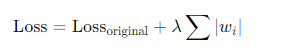

L1 приводит к разреженным весам (некоторые веса становятся равными нулю), что полезно для отбора признаков.

- L2 регуляризация добавляет сумму квадратов весов:

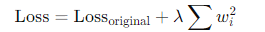

L2 регуляризация способствует тому, чтобы веса сети были маленькими, но не нулевыми, что делает модель более устойчивой к шумам в данных.
L2 регуляризация часто называется weight decay, так как она уменьшаeт значения весов во время обновления.

2.** Dropout:**
Dropout случайно отключает нейроны во время обучения с заданной вероятностью p. Это предотвращает зависимость сети от определённых путей передачи информации и способствует тому, чтобы сеть училась более устойчивым признакам.
Например, если p=0.5, то на каждой итерации половина нейронов в слое не участвует в вычислениях.
Dropout помогает уменьшить коадаптацию нейронов и делает сеть более обобщающей.

3. **Batch Normalization:**
Batch Normalization нормализует выходы каждого слоя на основе среднего и дисперсии по мини-батчу. Это уменьшает зависимость от инициализации весов и ускоряет обучение, предотвращая переобучение.
Несмотря на то, что основной целью BatchNorm является стабилизация и ускорение обучения, он также действует как регуляризатор, уменьшая необходимость в других методах регуляризации.

4. **Early Stopping:**
Early Stopping — метод остановки обучения, когда ошибка на валидационной выборке перестаёт уменьшаться. Это предотвращает переобучение на тренировочных данных, так как обучение останавливается до того, как модель начнёт подстраиваться под шум.

5. **Data Augmentation:**
Data Augmentation — искусственное увеличение объёма тренировочных данных путём применения различных трансформаций (повороты, сдвиги, изменение яркости и контраста) к изображениям или добавление шума к текстовым данным.
Это помогает модели не переобучаться на специфические особенности тренировочных данных и улучшает её способность обобщать.

6. **DropConnect:**
DropConnect — это обобщение метода Dropout. Вместо случайного отключения нейронов, в DropConnect случайным образом отключаются веса. Это тоже заставляет сеть быть более устойчивой и снижает переобучение.

7. **Regularization Through Architecture (Weight Sharing):**
Архитектурные подходы, такие как свёрточные слои (CNN), где веса разделяются между нейронами, также можно рассматривать как форму регуляризации. Это уменьшает количество параметров модели и предотвращает переобучение.

8. **Stochastic Depth:**
Stochastic Depth — метод, часто используемый в глубоких сетях. Он подразумевает случайное пропускание некоторых слоёв в модели в процессе обучения. Это похоже на Dropout, но на уровне слоёв.

9. **Label Smoothing:**
Label Smoothing помогает избежать уверенных предсказаний модели. Вместо того чтобы при обучении давать истинной метке 100% вероятность, её слегка "сглаживают". Например, истинной метке можно присвоить вероятность 0.9, а остальным — по 0.1, что предотвращает чрезмерную уверенность модели в предсказаниях.

##  Как работает Dropout и как его правильно использовать?

Dropout — это метод регуляризации, который предотвращает переобучение нейронных сетей. Он заключается в случайном "выключении" (установке в ноль) некоторых нейронов во время обучения с заданной вероятностью p, тем самым уменьшая количество активных нейронов в слое.

**Как работает Dropout:**
- В процессе обучения на каждой итерации некоторые нейроны случайным образом "выключаются" (не участвуют в передаче информации), и веса, связанные с этими нейронами, временно игнорируются.
- Это предотвращает модель от излишнего запоминания данных и помогает ей выучить более устойчивые и обобщающие признаки.
- При инференсе (тестировании), все нейроны остаются активными, но веса масштабируются с учетом вероятности Dropout (обычно веса умножаются на 1−p, где p — вероятность "выключения" нейрона во время обучения).

**Преимущества Dropout:**
- Снижает вероятность переобучения (overfitting) за счет уменьшения зависимости между нейронами.
- Делает модель более устойчивой, так как она вынуждена полагаться на различные подмножества нейронов для предсказаний.

**Как правильно использовать Dropout**:
- Обычно Dropout используется на полносвязных слоях (fully connected layers) в конце сети, где переобучение более вероятно.
- Стандартное значение для вероятности "выключения" нейронов p — от 0.2 до 0.5. Для свёрточных слоев Dropout обычно выбирается с меньшей вероятностью (например, 0.1-0.3).
- Dropout лучше работает в больших сетях, где высок риск переобучения, но в маленьких сетях он может привести к недостаточному обучению (underfitting).

## Что такое Batch Normalization и как оно помогает в обучении модели?

Batch Normalization (нормализация батчей) — это техника, которая стандартизирует входные данные для каждого слоя нейронной сети, что помогает ускорить и стабилизировать процесс обучения.

Как работает Batch Normalization:
На каждом слое нейронной сети входные данные нормализуются по мини-батчу, т.е. вычитанием среднего значения и делением на стандартное отклонение для каждого батча:

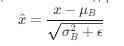

После нормализации добавляется масштабирование и смещение:

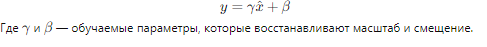

**Преимущества Batch Normalization:**
- Ускоряет обучение: Благодаря тому, что нормализованные данные имеют одинаковый масштаб, модель может использовать более высокие скорости обучения без риска дивергенции.
- Предотвращает переобучение: Batch Normalization действует как регуляризация, снижая зависимость от конкретных значений данных.
- Снижает зависимость от начальной инициализации: Нормализация данных уменьшает влияние начальных весов, делая обучение более устойчивым.
- Уменьшает внутреннее ковариационное смещение (internal covariate shift): Поскольку данные внутри сети нормализуются, это предотвращает изменения распределения активаций между слоями, что стабилизирует обучение.

**Как правильно использовать Batch Normalization:**
- Batch Normalization обычно применяется после линейной трансформации (W*x) и перед функцией активации.
- Его можно использовать для всех типов слоев (полносвязные, свёрточные и т.д.).
- Batch Normalization можно комбинировать с другими методами регуляризации, такими как Dropout, хотя их нужно осторожно настраивать совместно.

## Что такое аугментация данных? Какие техники аугментации знаешь для разных доменов в DL?

**Аугментация данных** — это процесс создания новых обучающих примеров из существующих данных с помощью различных трансформаций. Цель аугментации — улучшить обобщающую способность модели, увеличить объем обучающего набора и предотвратить переобучение. Она часто применяется в ситуациях, когда данных недостаточно для обучения сложных моделей глубокого обучения.

Аугментация особенно полезна в задачах компьютерного зрения, обработки естественного языка и работы с большими языковыми моделями (LLM).

Техники аугментации данных в различных областях глубокого обучения:

 1. **Аугментация в компьютерном зрении (CV)**

В области компьютерного зрения аугментация применяется для изображений и видео. Примеры техник включают в себя различные геометрические, цветовые и другие преобразования:

- **Геометрические преобразования**:
  - **Повороты**: Изображения могут поворачиваться на случайные углы (например, на 90°, 180°, 270°).
  - **Отражения**: Горизонтальное или вертикальное зеркальное отражение изображений.
  - **Масштабирование**: Изменение размера изображений (увеличение или уменьшение).
  - **Сдвиги и обрезка**: Сдвиг изображения по осям x и y, обрезка по краям.
  - **Повороты с интерполяцией**: Случайные повороты с заполнением пустых областей.
  
- **Цветовые преобразования**:
  - **Изменение яркости и контрастности**: Модификация яркости и контрастности изображения.
  - **Изменение насыщенности**: Изменение насыщенности цвета для создания вариаций.
  - **Шум**: Добавление случайного шума (например, гауссовский шум) на изображение для увеличения устойчивости к шуму в реальных данных.
  
- **Прочие преобразования**:
  - **Размытие (blurring)**: Применение различных фильтров размытия (например, гауссовского размытия) к изображению.
  - **Random Erasing**: Случайное удаление или замена части изображения на случайный фон или цвет.
  - **Генеративные методы**: Использование GAN или вариационных автоэнкодеров для создания новых изображений.

Пример кода аугментации изображений с использованием библиотеки `torchvision`:


2. **Аугментация в обработке естественного языка (NLP)**

Аугментация данных в NLP применяется к тексту и направлена на изменение или генерацию новых текстов, не нарушающих смысл и синтаксис. Примеры техник аугментации в NLP:

- **Замена синонимов (Synonym Replacement)**:
  - Замена слов в тексте их синонимами для создания вариативных примеров. Например, вместо слова "большой" можно использовать "огромный".
  
- **Перемешивание слов (Word Shuffling)**:
  - Случайное перемешивание слов в предложении без нарушения общей структуры и смысла.
  
- **Удаление слов (Word Deletion)**:
  - Случайное удаление незначимых слов в предложении (например, предлогов или вспомогательных слов).

- **Back Translation**:
  - Перевод предложения на другой язык и обратно с помощью машинного перевода для создания измененных версий текста. Например, перевод предложения с английского на французский и обратно на английский может создать новые примеры с незначительными изменениями структуры.

- **Генеративные модели (GPT-3, T5)**:
  - Использование моделей вроде GPT-3 для создания новых текстов, похожих по смыслу на оригинальные.


3. **Аугментация для больших языковых моделей (LLM)**

Аугментация для больших языковых моделей часто связана с генерацией синтетических данных или дополнительными задачами для улучшения качества предсказаний.

- **Data Augmentation через генеративные модели**:
  - Использование LLM (например, GPT-3 или T5) для создания синтетических данных. Модель может генерировать варианты текстов или ответов на запросы, что увеличивает разнообразие данных.
  
- **Paraphrasing (перефразирование)**:
  - Использование LLM для генерации перефразированных версий текстов, что помогает улучшить устойчивость модели к вариативности запроса.

- **Masked Language Modeling (MLM)**:
  - Модели, как BERT, обучаются на предсказании скрытых слов. Добавление случайных масок к текстам помогает создать больше вариаций для обучения.

- **Noise Injection (введение шума)**:
  - Добавление случайных опечаток, пропусков символов или перестановок букв в словах для тренировки моделей, способных справляться с зашумленными данными.



**Заключение:**
Аугментация данных — это важный инструмент для улучшения качества модели и предотвращения переобучения. Она используется в различных областях глубокого обучения:
- В **компьютерном зрении** используются геометрические, цветовые и шумовые преобразования изображений.
- В **обработке естественного языка** применяются техники синонимической замены, перефразирования и генеративные модели.
- Для **больших языковых моделей (LLM)** создаются синтетические данные или варианты текстов с помощью генеративных моделей и других техник, таких как перефразирование и маскирование.

Правильное использование аугментации помогает улучшить обобщающие способности модели и делает её более устойчивой к изменению данных.

## Что такое layer normalization? почему использовать его лучше чем batch normalization

**Layer Normalization** — это метод нормализации данных внутри нейронных сетей, который применяется к каждому слою индивидуально, нормализуя активации внутри слоя по всем входным элементам (нейронам). Он используется для ускорения обучения и улучшения стабильности градиентов.

**Почему использовать Layer Normalization лучше, чем Batch Normalization?**

Batch Normalization (BN) и Layer Normalization (LN) решают похожие задачи, но работают по-разному. Вот ключевые различия и преимущества Layer Normalization:

1. Зависимость от размера батча:

- Batch Normalization вычисляет статистики (среднее и стандартное отклонение) по батчу. Это делает BN зависимым от размера батча. При малых батчах (например, в случае рекуррентных нейронных сетей или если память ограничена) Batch Normalization может работать плохо.

- Layer Normalization не зависит от батча, так как нормализация происходит для каждого отдельного примера. Это делает его особенно полезным для задач, где размер батча может быть маленьким или батчи могут быть неравномерными.

2. Последовательные данные:

- Batch Normalization менее эффективен при работе с последовательными данными, например, в рекуррентных нейронных сетях (RNN) или трансформерах. Нормализация по батчам плохо сочетается с временными зависимостями.
- Layer Normalization лучше подходит для работы с последовательными данными, так как нормализует каждый временной шаг индивидуально.

3. Онлайн обучение:

- Batch Normalization требует вычисления статистик по батчу, что может быть проблематично в задачах с онлайн-обучением, где данные приходят последовательно.
- Layer Normalization применим в таких задачах, так как не требует батчей и нормализует каждый пример независимо.
Преимущества для трансформеров:


Layer Normalization используется в архитектурах трансформеров (например, BERT, GPT) вместо Batch Normalization, так как эти модели обрабатывают данные последовательно, и требуется нормализация на уровне слоёв, а не батчей.

**Когда использовать Layer Normalization вместо Batch Normalization:**
- Маленькие батчи: Если ваша модель обучается на маленьких батчах, или если размер батча сильно варьируется (например, при работе с последовательностями переменной длины), Layer Normalization будет более устойчивым выбором.
- Последовательные данные: Для рекуррентных сетей (RNN, LSTM) или моделей с временной зависимостью Layer Normalization предпочтительнее.

Трансформеры и NLP: В современных архитектурах трансформеров используется Layer Normalization для стабилизации обучения. Это позволяет лучше справляться с последовательными данными и длинными зависимостями.

Заключение
Layer Normalization подходит для более широкого круга задач, особенно когда работа с последовательными данными или маленькими батчами важна для модели. В то время как Batch Normalization хорошо работает в больших батчах и в компьютерном зрении, Layer Normalization даёт большую гибкость и надёжность для сложных архитектур и задач, таких как обработка естественного языка и работы с последовательностями.